# 01. 数据读取与预处理

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
tripdata = pd.read_csv('green_tripdata_2015-04.csv')

In [3]:
tripdata.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015/4/1 0:00,2015/4/1 0:08,N,1,-73.958817,40.716824,-73.982971,40.696007,1,...,11.0,0.5,0.5,2.46,0.0,NaN,0.3,14.76,1,1
1,2,2015/4/1 0:00,2015/4/1 0:07,N,1,-73.937531,40.804501,-73.946800,40.815998,1,...,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2,1
2,2,2015/4/1 0:00,2015/4/1 0:02,N,1,-73.955818,40.681152,-73.955406,40.687145,1,...,4.0,0.5,0.5,0.70,0.0,NaN,0.3,6.00,1,1
3,2,2015/4/1 0:00,2015/4/1 0:05,N,1,-73.830551,40.759460,-73.825363,40.741589,1,...,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
4,2,2015/4/1 0:00,2015/4/1 0:05,N,1,-73.912086,40.775356,-73.915474,40.764091,1,...,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1


In [4]:
tripdata.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

## 特征描述

| Field Name            | Description |
|-----------------------|-------------|
| VendorID              |TPEP供应商 <br>1. Creative Mobile Technologies<br>2. VeriFone Inc. |
| lpep_pickup_datetime  | 上车时间 |
| Lpep_dropoff_datetime | 下车时间 |
| Passenger_count       | 乘客数量 |
| Trip_distance         | 里程 |
| Pickup_longitude      | 上车经度 |
| Pickup_latitude       | 上车纬度 |
| RateCodeID            | 行程评分 <br>1. Standard rate<br>2. JFK<br>3. Newark<br>4. Nassau or Westchester<br>5. Negotiated fare<br>6. Group ride |
| Store_and_fwd_flag    | 是否存储后上传 <br>Y = store and forward trip<br>N = not a store and forward trip |
| Dropoff_longitude     | 下车经度 |
| Dropoff_latitude      | 下车纬度 |
| Payment_type          | 支付方式 <br>1. Credit card<br>2. Cash<br>3. No charge<br>4. Dispute<br>5. Unknown<br>6. Voided trip |
| Fare_amount           | 基础费用 |
| Extra                 | 额外费用（夜间，繁忙时段） |
| MTA_tax               | $0.50 MTA 税费 |
| Improvement_surcharge | 改善附加费 |
| Tip_amount            | 行程小费 |
| Tolls_amount          | 过路费 |
| Total_amount          | 向乘客收取的费用总额 |
| Ehail_fee            | 电召车费用 |


In [5]:
print("Number of nan values = \n{}".format(tripdata.isnull().sum()))

Number of nan values = 
VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1048575
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      0
dtype: int64


在任务中，我们并不使用“电召车费用”，因此空值不进行处理。

## 数据清理

根据网站，https://www.flickr.com/places/info/2459115 。纽约以坐标（纬度、经度）- (40.5774, -74.15) & (40.9176,-73.7004) 为界，因此，不在这些坐标范围内的任何坐标（包括上车和下车）我们都不予考虑，因为我们只关注从纽约出发的取车。

In [6]:
# 删除纽约市外的行程
tripdata = tripdata[~((tripdata.Pickup_latitude <= 40.5774) | 
              (tripdata.Pickup_longitude <= -74.15) | 
              (tripdata.Pickup_latitude >= 40.9176) | 
              (tripdata.Pickup_longitude >= -73.7004)|
              (tripdata.Dropoff_latitude <= 40.5774) | 
                         (tripdata.Dropoff_longitude <= -74.15) | 
                         (tripdata.Dropoff_latitude >= 40.9176) | 
                         (tripdata.Dropoff_longitude >= -73.7004))]
# 查看结果
tripdata.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015/4/1 0:00,2015/4/1 0:08,N,1,-73.958817,40.716824,-73.982971,40.696007,1,...,11.0,0.5,0.5,2.46,0.0,NaN,0.3,14.76,1,1
1,2,2015/4/1 0:00,2015/4/1 0:07,N,1,-73.937531,40.804501,-73.946800,40.815998,1,...,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2,1
2,2,2015/4/1 0:00,2015/4/1 0:02,N,1,-73.955818,40.681152,-73.955406,40.687145,1,...,4.0,0.5,0.5,0.70,0.0,NaN,0.3,6.00,1,1
3,2,2015/4/1 0:00,2015/4/1 0:05,N,1,-73.830551,40.759460,-73.825363,40.741589,1,...,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
4,2,2015/4/1 0:00,2015/4/1 0:05,N,1,-73.912086,40.775356,-73.915474,40.764091,1,...,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1


In [7]:
def timeToUnix(t):
    """Convert datetime string to unix time."""
    change = datetime.strptime(t, "%Y/%m/%d %H:%M")
    t_tuple = change.timetuple() 
    return time.mktime(t_tuple)


def dfWithTripTimes(df):
    """Calculate trip duration and add it to the dataframe."""
    duration = df[["lpep_pickup_datetime", "Lpep_dropoff_datetime"]]
    pickup_time = [timeToUnix(pkup) for pkup in duration["lpep_pickup_datetime"].values]
    dropoff_time = [timeToUnix(drpof) for drpof in duration["Lpep_dropoff_datetime"].values]

    trip_duration = (np.array(dropoff_time) - np.array(pickup_time))/float(60)
    
    NewFrame = df[['lpep_pickup_datetime','Lpep_dropoff_datetime','Passenger_count','Trip_distance','Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude','Total_amount']]
    NewFrame["Trip_duration"] = trip_duration
    NewFrame["Pickup_time"] = pickup_time
    NewFrame["Speed"] = (NewFrame["Trip_distance"]/NewFrame["Trip_duration"])*60  #speed in miles/hr

    return NewFrame

In [8]:
tripdataWithTripTimes = dfWithTripTimes(tripdata)
tripdataWithTripTimes.head()

,lpep_pickup_datetime,Lpep_dropoff_datetime,Passenger_count,Trip_distance,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Total_amount,Trip_duration,Pickup_time,Speed
0,2015/4/1 0:00,2015/4/1 0:08,1,3.08,-73.958817,40.716824,-73.982971,40.696007,14.76,8.0,1.427818e+09,23.100000
1,2015/4/1 0:00,2015/4/1 0:07,1,1.21,-73.937531,40.804501,-73.946800,40.815998,8.30,7.0,1.427818e+09,10.371429
2,2015/4/1 0:00,2015/4/1 0:02,1,0.64,-73.955818,40.681152,-73.955406,40.687145,6.00,2.0,1.427818e+09,19.200000
3,2015/4/1 0:00,2015/4/1 0:05,1,1.34,-73.830551,40.759460,-73.825363,40.741589,7.80,5.0,1.427818e+09,16.080000
4,2015/4/1 0:00,2015/4/1 0:05,1,0.98,-73.912086,40.775356,-73.915474,40.764091,7.30,5.0,1.427818e+09,11.760000


## 异常值处理

### 行程时间

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

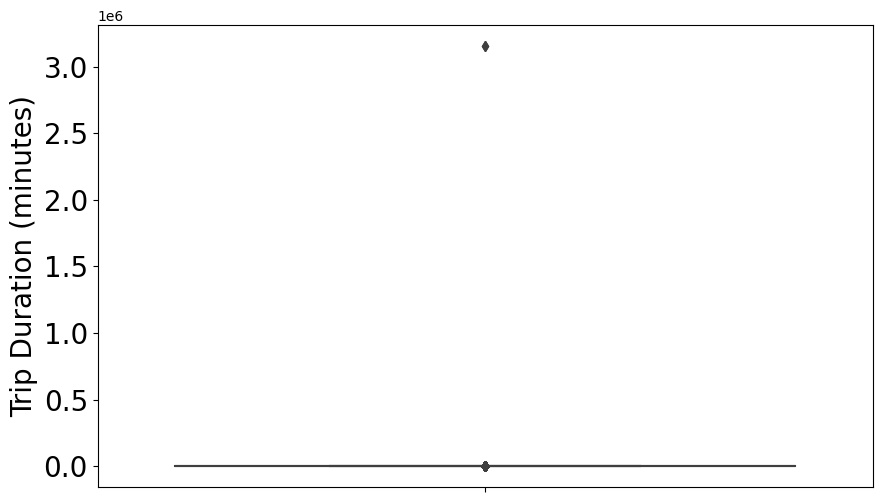

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(y="Trip_duration", data=tripdataWithTripTimes, orient="v")
plt.tick_params(labelsize=20)
plt.ylabel("Trip Duration (minutes)", fontsize=20)
plt.show()

In [11]:
quantile_tripDuration = tripdataWithTripTimes.Trip_duration.quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

In [12]:
qValues = np.round(np.arange(0.00, 1.01, 0.1), 2)
for i in qValues:
    print("前 {} %的行程时间是 {} min".format((int(i*100)), quantile_tripDuration[i]))

前 0 %的行程时间是 -483.0 min
前 10 %的行程时间是 4.0 min
前 20 %的行程时间是 5.0 min
前 30 %的行程时间是 7.0 min
前 40 %的行程时间是 8.0 min
前 50 %的行程时间是 10.0 min
前 60 %的行程时间是 12.0 min
前 70 %的行程时间是 15.0 min
前 80 %的行程时间是 19.0 min
前 90 %的行程时间是 25.0 min
前 100 %的行程时间是 3155397.0 min


In [13]:
qValues = np.round(np.arange(0.90, 1.01, 0.01), 2)
for i in qValues:
    print("前 {} %的行程时间是 {} min".format((int(i*100)), quantile_tripDuration[i]))

前 90 %的行程时间是 25.0 min
前 91 %的行程时间是 26.0 min
前 92 %的行程时间是 27.0 min
前 93 %的行程时间是 29.0 min
前 94 %的行程时间是 30.0 min
前 95 %的行程时间是 32.0 min
前 96 %的行程时间是 34.0 min
前 97 %的行程时间是 37.0 min
前 98 %的行程时间是 41.0 min
前 99 %的行程时间是 49.0 min
前 100 %的行程时间是 3155397.0 min


**剔除异常值数据**

In [14]:
tripdataWithTripTimes_cleaned = tripdataWithTripTimes[(tripdataWithTripTimes.Trip_duration>1) & (tripdataWithTripTimes.Trip_duration<720)]

### 速度

In [15]:
def changingLabels(num):
    if num < 10**3:
        return num
    elif num>=10**3 and num < 10**6:
        return str(num/10**3)+"k"
    elif num>=10**6 and num < 10**9:
        return str(num/10**6) + "M"
    else:
        return str(num/10**9) + "B"

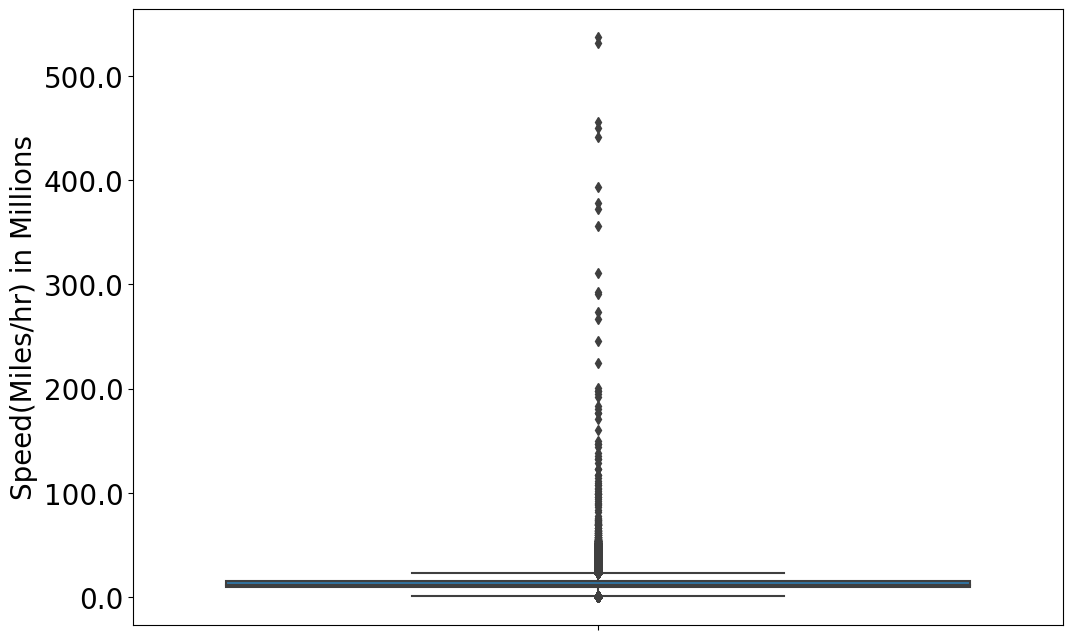

In [16]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(y="Speed", data=tripdataWithTripTimes_cleaned, orient="v")
ax.set_yticklabels([changingLabels(num) for num in ax.get_yticks()])
plt.tick_params(labelsize = 20)
plt.ylabel("Speed(Miles/hr) in Millions", fontsize = 20)
plt.show()

In [17]:
quantile_speed = tripdataWithTripTimes_cleaned.Speed.quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

In [18]:
qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("前 {} %的速度是 {} mile/hr".format(int(i*100), quantile_speed[i]))

前 0 %的速度是 0.0 mile/hr
前 10 %的速度是 7.6909090909090905 mile/hr
前 20 %的速度是 9.0 mile/hr
前 30 %的速度是 10.05 mile/hr
前 40 %的速度是 11.0 mile/hr
前 50 %的速度是 11.999999999999998 mile/hr
前 60 %的速度是 13.0 mile/hr
前 70 %的速度是 14.299999999999999 mile/hr
前 80 %的速度是 16.200000000000003 mile/hr
前 90 %的速度是 19.97142857142857 mile/hr
前 100 %的速度是 537.0 mile/hr


In [19]:
qValues = np.round(np.arange(0.91, 1.01, 0.01), 3)
for i in qValues:
    print("前 {} %的速度是 {} mile/hr".format(int(i*100), quantile_speed[i]))

前 91 %的速度是 20.571428571428573 mile/hr
前 92 %的速度是 21.25 mile/hr
前 93 %的速度是 22.03433333333333 mile/hr
前 94 %的速度是 23.0 mile/hr
前 95 %的速度是 24.0 mile/hr
前 96 %的速度是 25.355555555555554 mile/hr
前 97 %的速度是 27.0 mile/hr
前 98 %的速度是 29.129509090908954 mile/hr
前 99 %的速度是 32.6 mile/hr
前 100 %的速度是 537.0 mile/hr


In [20]:
qValues = np.round(np.arange(0.991, 1.001, 0.001), 4)
quantile_speed = tripdataWithTripTimes_cleaned.Speed.quantile(qValues)
for i in qValues:
    print("前 {} %的速度是 {} mile/hr".format((i*100), quantile_speed[i]))

前 99.1 %的速度是 33.089999999999996 mile/hr
前 99.2 %的速度是 33.63333333333333 mile/hr
前 99.3 %的速度是 34.2 mile/hr
前 99.4 %的速度是 34.9 mile/hr
前 99.5 %的速度是 35.72259065934059 mile/hr
前 99.6 %的速度是 36.65688571428598 mile/hr
前 99.7 %的速度是 37.93846153846154 mile/hr
前 99.8 %的速度是 39.675 mile/hr
前 99.9 %的速度是 42.34931842105304 mile/hr
前 100.0 %的速度是 537.0 mile/hr


**剔除异常值数据**

In [21]:
tripdataWithTripTimes_cleaned = tripdataWithTripTimes_cleaned[(tripdataWithTripTimes_cleaned.Speed>1) & (tripdataWithTripTimes_cleaned.Speed<50)]

### 里程

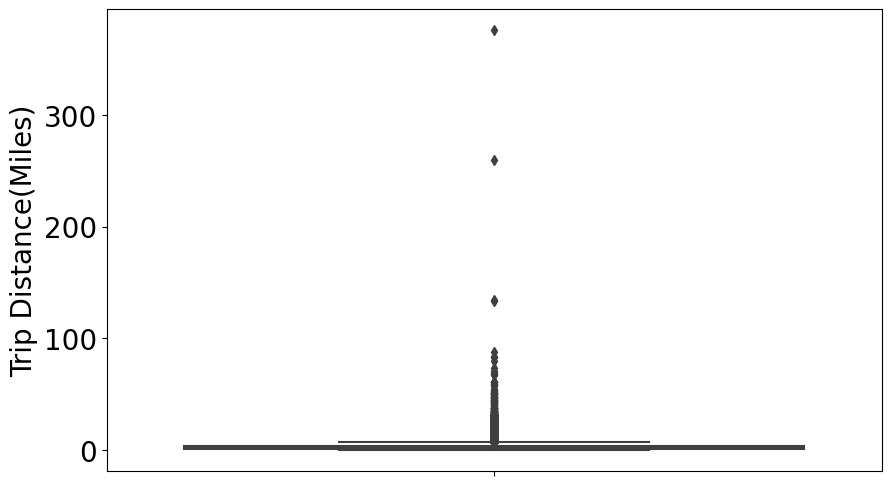

In [22]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot(y="Trip_distance", data = tripdataWithTripTimes_cleaned, orient = "v")

plt.tick_params(labelsize = 20)
plt.ylabel("Trip Distance(Miles)", fontsize = 20)
plt.show()

In [23]:
quantile_tripDistance = tripdataWithTripTimes_cleaned.Trip_distance.quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

In [24]:
qValues = np.round(np.arange(0.00, 1.01, 0.1), 2)
for i in qValues:
    print("前 {} %的里程是 {} miles".format(int(i*100), quantile_tripDistance[i]))

前 0 %的里程是 0.04 miles
前 10 %的里程是 0.73 miles
前 20 %的里程是 1.0 miles
前 30 %的里程是 1.28 miles
前 40 %的里程是 1.6 miles
前 50 %的里程是 2.0 miles
前 60 %的里程是 2.56 miles
前 70 %的里程是 3.3 miles
前 80 %的里程是 4.36 miles
前 90 %的里程是 6.4 miles
前 100 %的里程是 375.64 miles


In [25]:
qValues = np.round(np.arange(0.91, 1.01, 0.01), 3)
for i in qValues:
    print("前 {} %的里程是 {} miles".format(int(i*100), quantile_tripDistance[i]))

前 91 %的里程是 6.7 miles
前 92 %的里程是 7.05 miles
前 93 %的里程是 7.43 miles
前 94 %的里程是 7.88 miles
前 95 %的里程是 8.42 miles
前 96 %的里程是 9.12 miles
前 97 %的里程是 10.06 miles
前 98 %的里程是 11.41 miles
前 99 %的里程是 13.94 miles
前 100 %的里程是 375.64 miles


In [26]:
quantile_tripDistance = tripdataWithTripTimes_cleaned.Trip_distance.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("前 {} %的里程是 {} miles".format((i*100), quantile_tripDistance[i]))

前 99.1 %的里程是 14.31 miles
前 99.2 %的里程是 14.74 miles
前 99.3 %的里程是 15.2 miles
前 99.4 %的里程是 15.73 miles
前 99.5 %的里程是 16.57 miles
前 99.6 %的里程是 17.510919999999462 miles
前 99.7 %的里程是 18.2 miles
前 99.8 %的里程是 19.09 miles
前 99.9 %的里程是 21.09 miles
前 100.0 %的里程是 375.64 miles


**剔除异常值数据**

In [27]:
tripdataWithTripTimes_cleaned = tripdataWithTripTimes_cleaned[(tripdataWithTripTimes_cleaned.Trip_distance>0) & (tripdataWithTripTimes_cleaned.Trip_distance<23)]

## 聚类/划分

MiniBatchKMeans 是 KMeans 算法的一种变体，它使用迷你批次来减少计算时间，同时仍试图优化相同的目标函数。迷你批次是输入数据的子集，在每次训练迭代中随机抽样。这些迷你批次大大减少了收敛到局部解决方案所需的计算量。与其他缩短 k-means 收敛时间的算法相比，迷你批次 k-means 算法产生的结果通常只比标准算法稍差。

In [28]:
from sklearn.cluster import MiniBatchKMeans

In [29]:
coord = tripdataWithTripTimes_cleaned[["Pickup_latitude", "Pickup_longitude"]].values
regions = MiniBatchKMeans(n_clusters = 30, batch_size = 10000).fit(coord)
tripdataWithTripTimes_cleaned["pickup_cluster"] = regions.predict(tripdataWithTripTimes_cleaned[["Pickup_latitude", "Pickup_longitude"]])

In [30]:
tripdataWithTripTimes_cleaned.head()

,lpep_pickup_datetime,Lpep_dropoff_datetime,Passenger_count,Trip_distance,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Total_amount,Trip_duration,Pickup_time,Speed,pickup_cluster
0,2015/4/1 0:00,2015/4/1 0:08,1,3.08,-73.958817,40.716824,-73.982971,40.696007,14.76,8.0,1.427818e+09,23.100000,20
1,2015/4/1 0:00,2015/4/1 0:07,1,1.21,-73.937531,40.804501,-73.946800,40.815998,8.30,7.0,1.427818e+09,10.371429,21
2,2015/4/1 0:00,2015/4/1 0:02,1,0.64,-73.955818,40.681152,-73.955406,40.687145,6.00,2.0,1.427818e+09,19.200000,22
3,2015/4/1 0:00,2015/4/1 0:05,1,1.34,-73.830551,40.759460,-73.825363,40.741589,7.80,5.0,1.427818e+09,16.080000,19
4,2015/4/1 0:00,2015/4/1 0:05,1,0.98,-73.912086,40.775356,-73.915474,40.764091,7.30,5.0,1.427818e+09,11.760000,0


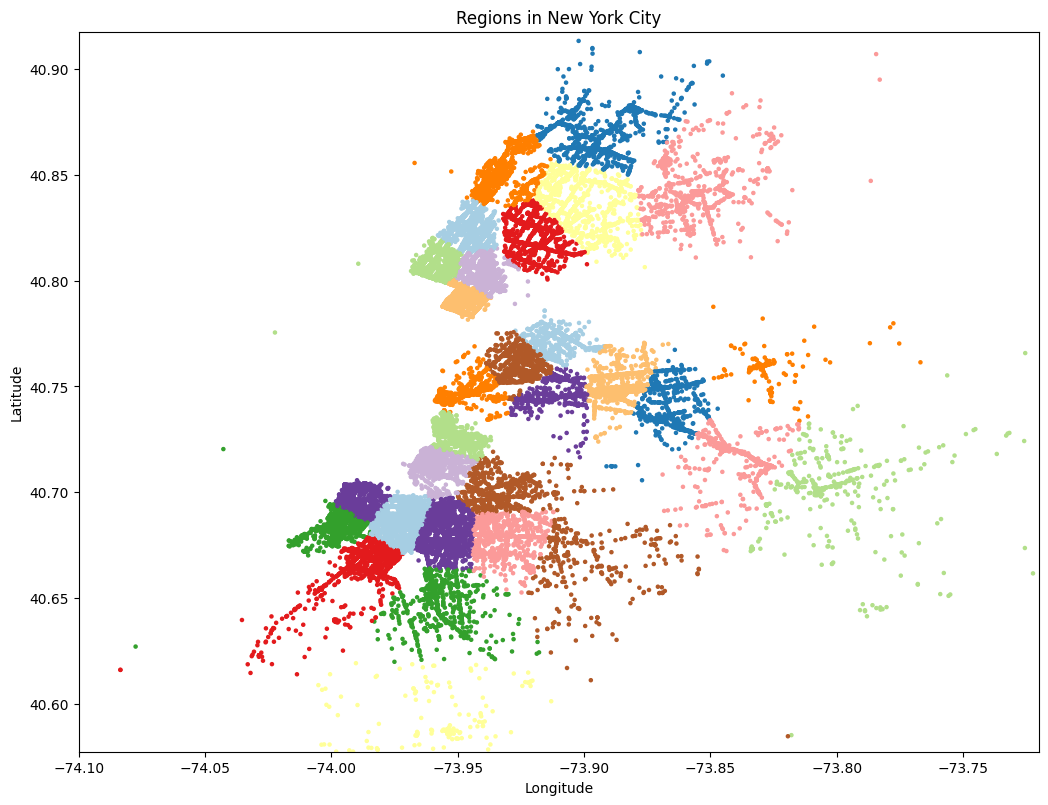

In [31]:
NYC_latitude_range = (40.5774, 40.9176)
NYC_Longitude_range = (-74.15, -73.7004)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.scatter(x = tripdataWithTripTimes_cleaned.Pickup_longitude.values[:70000], y = tripdataWithTripTimes_cleaned.Pickup_latitude.values[:70000], c = tripdataWithTripTimes_cleaned.pickup_cluster.values[:70000], cmap = "Paired", s = 5)
ax.set_xlim(-74.10, -73.72)
ax.set_ylim(40.5774, 40.9176)
ax.set_title("Regions in New York City")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

### 导出

In [32]:
tripdataWithTripTimes_cleaned.to_csv('TripDataWithTripTimes_cleaned.csv')